You may add additional cells as necessary (Insert-> Cell above/cell below) in each section.

Please try to keep code related to each section under the appropriate heading.

Also, please provide comments using the # sign in code cells or add additional Markdown cells to provide lengthier explanations if necessary (Insert-> Cell above or cell below, click in new cell, Cell->Cell Type->Markdown).

You are encouraged to do this work on your own and avoid any appearance of academic misconduct. You are also encouraged to ask questions of the instructor and each other when the need arises. Please use your best judgement.

__Import the data from the CSV files

In [414]:
import numpy as np
import pandas as pd
weather2020_df = pd.read_csv("w2020.csv", usecols=["Date/Time", "Max Temp (°C)", "Total Precip (mm)"])
weather2021_df = pd.read_csv("w2021.csv", usecols=["Date/Time", "Max Temp (°C)", "Total Precip (mm)"])
network_df = pd.read_csv("NetworkData.csv", usecols=["Date", "Delay (ms)", "Down (Mbps)", "Up (Mbps)", "Day"])

__Combine the data files.

In [415]:
weather_df = pd.concat([weather2020_df,weather2021_df], axis=0)
network_df = network_df.rename(columns={"Date":"Date/Time"})
complete_df = pd.merge(network_df, weather_df, on="Date/Time")
complete_df.head()

,Date/Time,Delay (ms),Down (Mbps),Up (Mbps),Day,Max Temp (°C),Total Precip (mm)
0,2020-09-09,78,71.12,6.46,4,27.0,0.0
1,2020-09-10,80,70.44,13.86,5,27.0,0.0
2,2020-09-11,74,72.54,13.92,6,18.0,0.0
3,2020-09-13,85,69.44,11.71,1,23.5,13.0
4,2020-09-14,75,74.81,5.85,2,18.5,0.0


__Plot the data

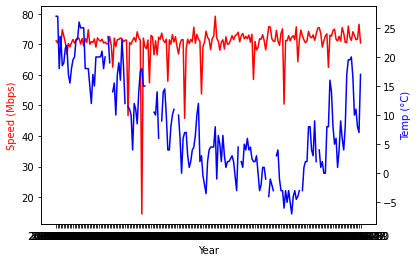

In [419]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
x = complete_df["Date/Time"]
ax1.plot(x, complete_df["Down (Mbps)"], "r-")
ax2.plot(x, complete_df["Max Temp (°C)"], "b-")

ax1.set_xlabel("Year")
ax1.set_ylabel("Speed (Mbps)", color="r")
ax2.set_ylabel("Temp (°C)", color="b")

plt.show()

__Calculate the central tendencies

In [466]:
print("The mean: " + str(complete_df["Up (Mbps)"].mean()))
print("The median: " + str(complete_df["Up (Mbps)"].median()))
print("The mode: " + str(complete_df["Up (Mbps)"].mode()))

The mean: 9.424050000000005
The median: 10.035
The mode: 0    13.88
dtype: float64


__Convert to a dictionary

In [618]:
complete_dict = complete_df.to_dict("records");
complete_dict

[{'Date/Time': '2020-09-09',
  'Delay (ms)': 78,
  'Down (Mbps)': 71.12,
  'Up (Mbps)': 6.46,
  'Day': 4,
  'Max Temp (°C)': 27.0,
  'Total Precip (mm)': 0.0},
 {'Date/Time': '2020-09-10',
  'Delay (ms)': 80,
  'Down (Mbps)': 70.44,
  'Up (Mbps)': 13.86,
  'Day': 5,
  'Max Temp (°C)': 27.0,
  'Total Precip (mm)': 0.0},
 {'Date/Time': '2020-09-11',
  'Delay (ms)': 74,
  'Down (Mbps)': 72.54,
  'Up (Mbps)': 13.92,
  'Day': 6,
  'Max Temp (°C)': 18.0,
  'Total Precip (mm)': 0.0},
 {'Date/Time': '2020-09-13',
  'Delay (ms)': 85,
  'Down (Mbps)': 69.44,
  'Up (Mbps)': 11.71,
  'Day': 1,
  'Max Temp (°C)': 23.5,
  'Total Precip (mm)': 13.0},
 {'Date/Time': '2020-09-14',
  'Delay (ms)': 75,
  'Down (Mbps)': 74.81,
  'Up (Mbps)': 5.85,
  'Day': 2,
  'Max Temp (°C)': 18.5,
  'Total Precip (mm)': 0.0},
 {'Date/Time': '2020-09-15',
  'Delay (ms)': 117,
  'Down (Mbps)': 72.7,
  'Up (Mbps)': 12.41,
  'Day': 3,
  'Max Temp (°C)': 19.0,
  'Total Precip (mm)': 0.0},
 {'Date/Time': '2020-09-16',
  'Del

__Use Pymongo to export to MongoDB

In [626]:
from pymongo import MongoClient as MC
client = MC("localhost", 27017)

In [627]:
db = client["finalProject"]
collection = db["network"]

In [628]:
collection.insert_many(complete_dict)

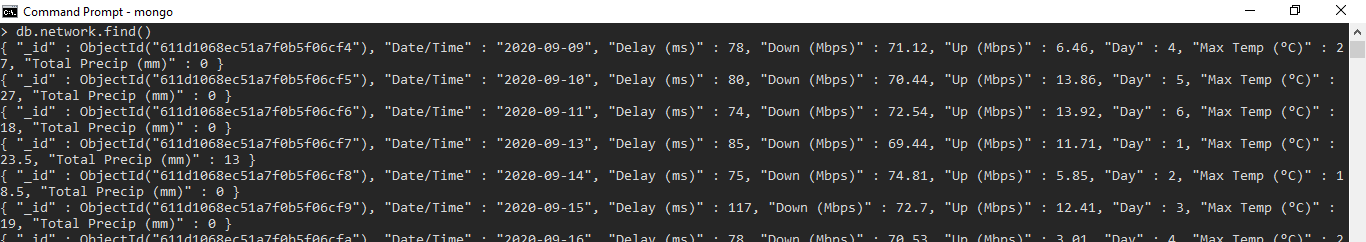

__Use Mongo's export command to create JSON file

mongoexport --host localhost --db finalProject --collection network --out C:\Hy_mgdb_data\network.json --jsonArray

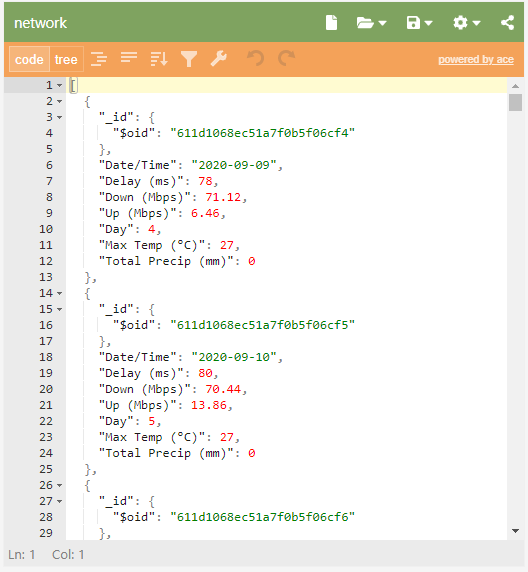

__Ingress the data into SQL Server

DROP TABLE IF EXISTS NetworkData
GO

SELECT Network.*
INTO NetworkData
FROM OPENROWSET (BULK N'C:\Hy_mgdb_data\network.json', SINGLE_CLOB) AS DATA
CROSS APPLY OPENJSON(BulkColumn)
WITH
(
	ID INT,
	Date DATE '$."Date/Time"',
	Delay DECIMAL '$."Delay (ms)"',
	Down DECIMAL(5,2) '$."Down (Mbps)"',
	Up DECIMAL(5,2) '$."Up (Mbps)"',
	Day SMALLINT '$."Day"',
	MaxTemp DECIMAL(5,2) '$."Max Temp (Â°C)"',
	Precipitation DECIMAL(5,2) '$."Total Precip (mm)"'
) AS Network

SELECT * FROM NetworkData